# Brief Introduction of LSTM with keras and a predict-future-values example

This is my first GitHub entry. I tried to compile some useful information with a simple example of how to train a LSTM Model with keras, and predict future values (outside dataset index). For this case dummy data with 50 entries is used, and then is converted into a pandas DataFrame for dateindex purposes (as every timeseries). The future entries will be 10 new dates (daily frequency was assumed).

I'm relative new to ML and timeseries forecasts, so there are a many improvements to make. But for the meantime I find this information useful as an introductory level for using keras and making some forecasts. Metrics evaluation (such as loss, acc, val_loss) are not evaluated, as this serves the purpose of showing a way to predict future values (model-tune and evaluation is for the user).

- Section 1 has a brief intro of LSTM and the steps needed for creating an LSTM structure.
- Section 2 has a future predict example.

Python - LSTM for Time Series Prediction

Original video code-source with a more detail explanation of keras and LSTM: https://www.youtube.com/watch?v=h8v9--50mdU

Conda environment for Jupyter notebook:
https://stackoverflow.com/questions/37085665/in-which-conda-environment-is-jupyter-executing

If you are new to Jupyter (as me): In this example, I'm using "tensorflow" environment, which has installed the keras/tensorflow libraries.
So first open "Anaconda prompt" (from windows search), search "python" and then activate the environment needed (e.g. "conda activate tensorflow), and then open "jupyter notebook" (as if opening "spyder" in windows). It will load a web browser page with all desktop folders available form the pc. Search for your work directory (e.g. "Desktop" and "Folder name") and create a new juoyter project or cotinue editing one created. 

## 1. -------------------------------------------------------------------------------------------------------------------------------

# Long Short-Term Memory for Sequence Modeling

Long short-term memory (LSTM) is special recurrent neural network, capable of learning long-term dependencies. Appliances energy patterns have a high degree of temporal and spatial correlation. One problem that arises from the unfolding of an RNN is that the gradient of some of the weights starts to become too small or too large if the network is unfolded for too many time steps. This is called the vanishing gradient problem. A type of network architecture that solves this problem is the LSTM. In a typical implementation, the hidden layer is replaced by a complex block of computing units composed by gates that trap the error in the block, forming a so-called “error carrousel”. Figure 4 shows a local architecture of LSTM neural network. There are three types of gates within a unit [29]:

    • Forget gate: conditionally decides what information to throw away from the block.
    • Input gate: conditionally decides which values from the input to update the memory state.
    • Output gate: conditionally decides what to output based on input and the memory of the block.

The gates decide what information to throw away and what information to keep, that depends on context of data for capturing long-range dependencies in sequences. We input context to first layer of LSTM, model keeps the context for long-time in memory.

Source of image below: DeepEnergy: Prediction of Appliances Energywith Long-Short Term Memory Recurrent Neural Network.
https://doi.org/10.1007/978-3-319-75420-8_21

[29] Hochreiter, S., Schmidhuber, J.: Long short-term memory. Neural Comput. 9(8), 1735–1780 (1997)

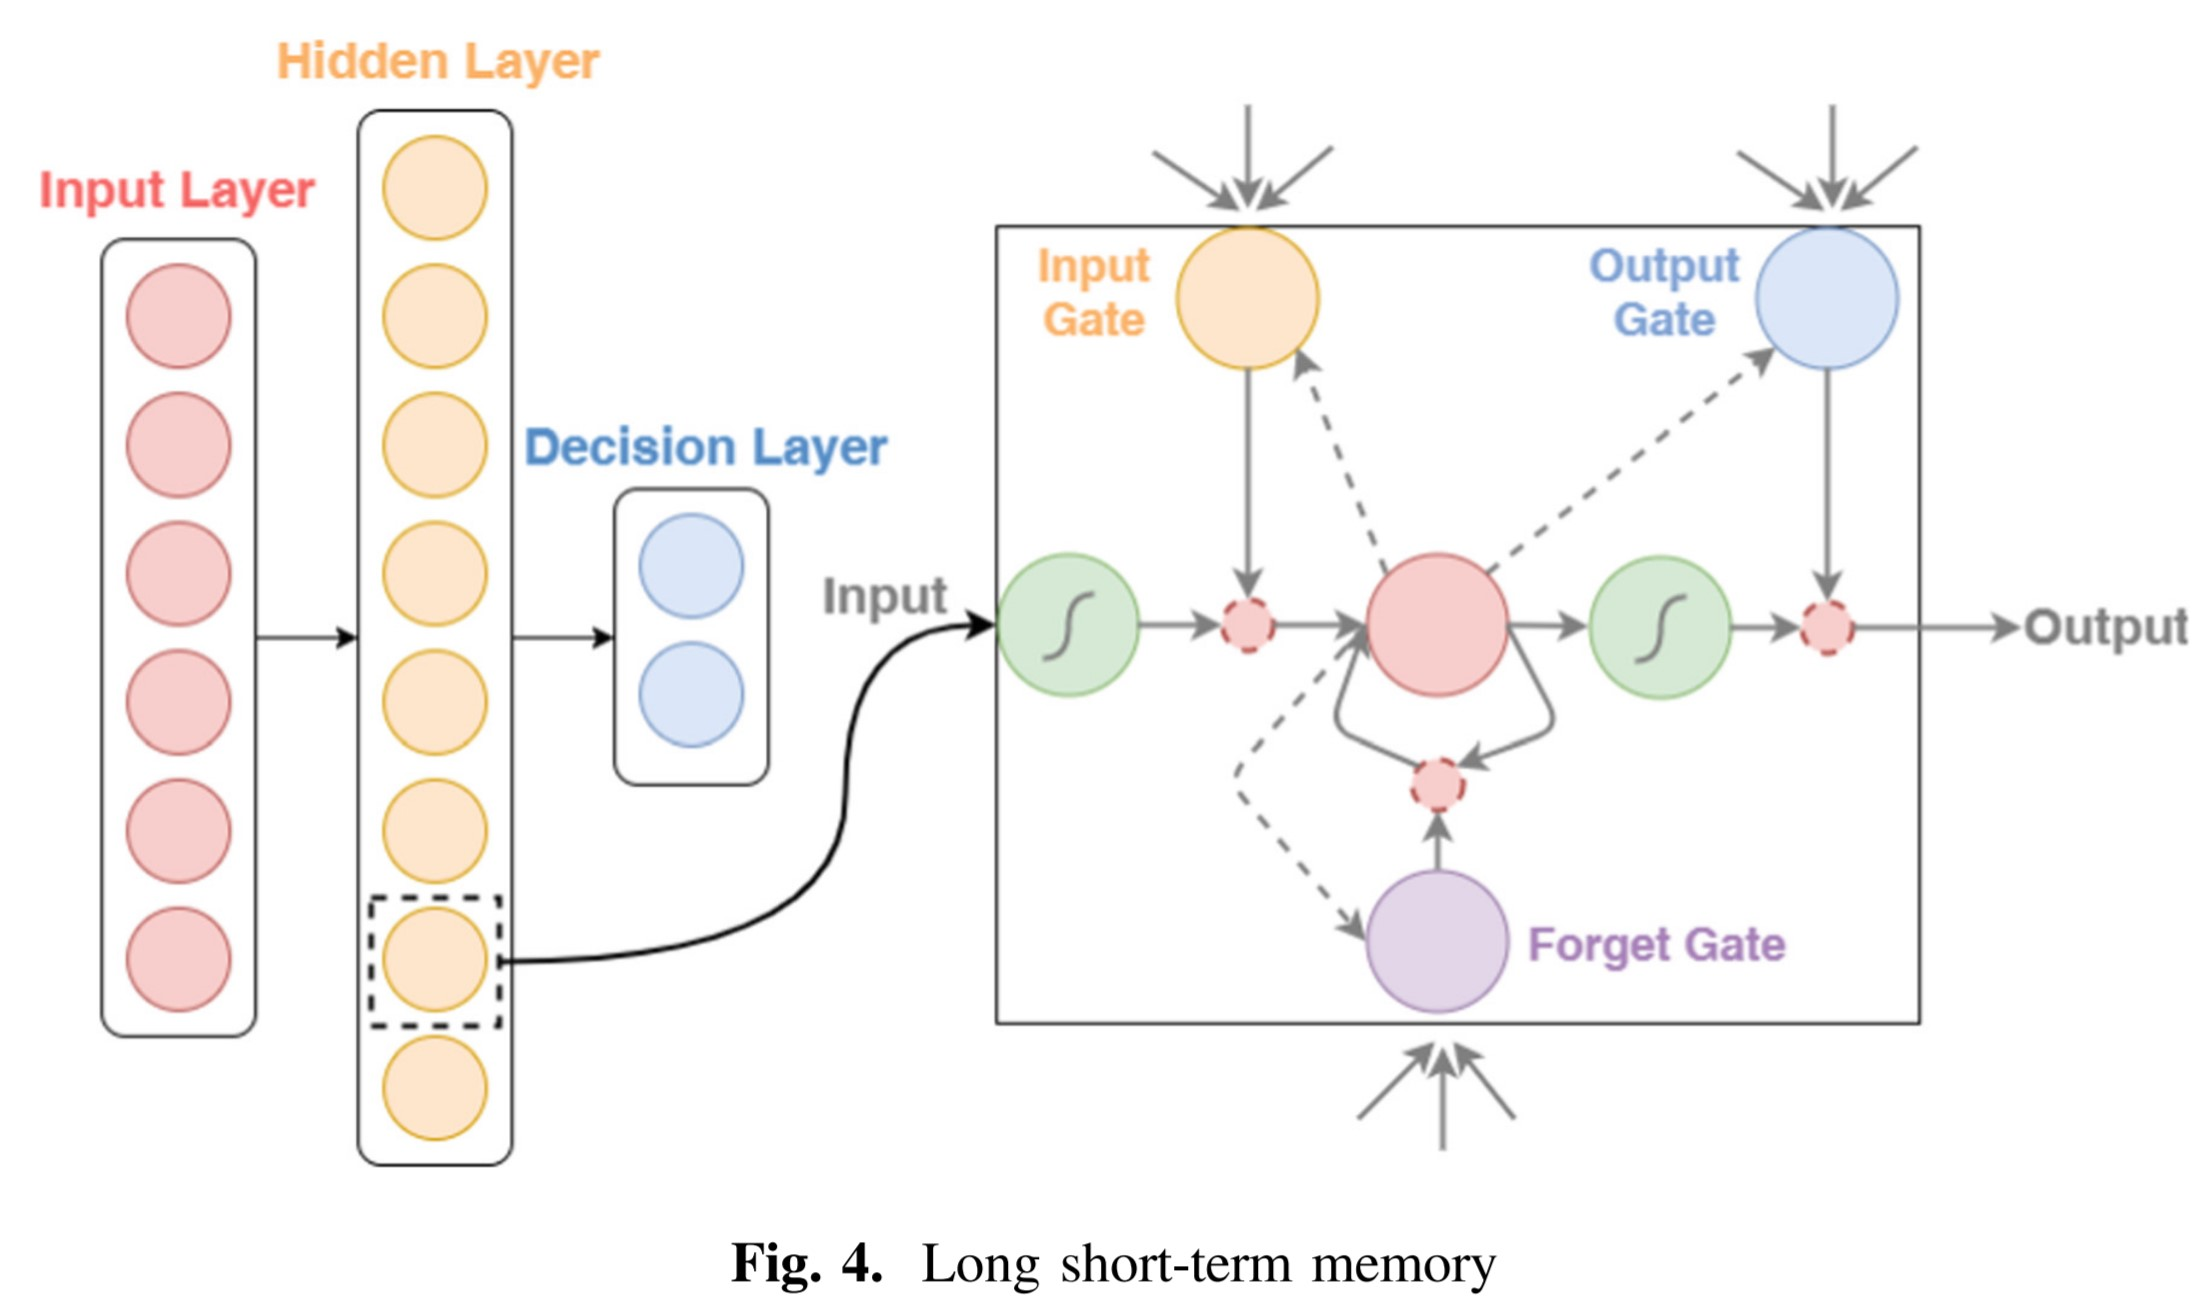

# Keras: Deep Learning Theory

Keras is a high-level neural networks API, written in Python and capable of running on top of either TensorFlow or Theano. It was developed with a focus on enabling fast experimentation.

Source: A Bit of Deep Learning and Keras - 
https://www.youtube.com/playlist?list=PLgJhDSE2ZLxaPX0jteHZG4skdj8ZrST9d

## Getting Started

### 1. Creating the Model

The core data structure of Keras is a model, a way to organize layers. For more complex architectures, you should use the Keras functional API, which allows to build arbitrary graphs of layers.

The simplest type of model is the Sequential model, a linear stack of layers.

    from keras.models import Sequential

    model = Sequential()

More information inside Jupyter:

    Sequential?
    
Model summary (layers shape, parameters):
    
    model.summary()


### 2. Train and Test Datasets

Divide your original data into Train and Test, of any dimension.

    (x_train, y_train)
    (x_test, y_test) 

e.g. x_train.shape = (404, 13) where 404: rows, and 13 columns/attributes, for both X and Y training sets.r

### 3. Adding Hidden Layers

How many hidden layers will be used in the model. Generally, only 1 hidden layer with a predefine numbers of neurons is used, but more complex architectures could be created. 

The FIRST hidden layer will ALLWAYS have the samen dimension (columns/attributes) of the input data (i.e. x_train). 
Following the example for the first hidden layer, input_dim = 13, as x_train have 13 columns. In this case, the first hidden layer will have a 13 dimensional output.

For the second hidden layer and so forth, automatic shape inference is done (nodes connections).

Each hidden layer has an activation function, depending of the nature of the data.

    from keras.layers import Dense

    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))

### 3.1 Specifying the input shape

The model needs to know what input shape it should expect. For this reason, the first layer in a Sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape. 

There are several possible ways to do this:

- Pass an input_shape argument to the first layer. This is a shape tuple (a tuple of integers or None entries, where None indicates that any positive integer may be expected). In input_shape, the batch dimension is not included.

- Some 2D layers, such as Dense, support the specification of their input shape via the argument input_dim, and some 3D temporal layers support the arguments input_dim and input_length.

- If you ever need to specify a fixed batch size for your inputs (this is useful for stateful recurrent networks), you can pass a batch_size argument to a layer. If you pass both batch_size=32 and input_shape=(6, 8) to a layer, it will then expect  every batch of inputs to have the batch shape (32, 6, 8).

### 4. Model Compile

Once the model is created, compiling it is needed (and specify some opitonal parameters).

Before training a model, you need to configure the learning process, which is done via the compile method. It receives three arguments:

- An optimizer (the learning technic). This could be the string identifier of an existing optimizer (such as rmsprop or adagrad), or an instance of the Optimizer class. See: optimizers.


- A loss function (objetctive). This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as categorical_crossentropy or mse), or it can be an objective function. See: losses.


- A list of metrics. For any classification problem you will want to set this to metrics=['accuracy']. A metric could be the string identifier of an existing metric or a custom metric function.

##### For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

##### For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

##### For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

##### For custom metrics
    import keras.backend as K

    def mean_pred(y_true, y_pred):
        return K.mean(y_pred)

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy', mean_pred])

### 4.1 Model Training

Keras models are trained on Numpy arrays of input data and labels. For training a model there are three functions:

- The fit function, this is the most basic
- The fit_generator. This is a bit more complicated as it takes in a generator instead of a numpy array. Often used for large datasets.
- The train_on_batch function which allows you to do a single gradient update over one batch of samples.

### 5. Model Fit

Training data, output data, and more parameters are definded

x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.

epochs: for example if we have 100 train data, and the epochs is 10, the model will go trhough 1,000 samples.

##### Example 1
    model.fit(x_train, y_train, epochs=20, batch_size=404)

##### Example 2
    model.fit(
        data,                       # Train data/learning from    (x_train)
        labels,                     # Output data/expected values (y_train)
        batch_size=32,              # How many examples do we train in tandem
        epochs=10,                  # How many times do we go through the entire dataset (epochs x datalength)
        verbose=2,                  # 1: show progress bar - 2: skip progress bar
        callbacks=None, 
        validation_split=0.2,       # Specify the percentage of data to use for validation
        validation_data=None, 
        shuffle=True,               # True for a better training model
        class_weight=None,          # If there are missing classes, or if there is a mayority (e.g. 90% + and 10% -)
        sample_weight=None, 
        initial_epoch=0)            # Starts in 0

##### Example 3

Definind data with a function:

    def data_gen():
        for datum, label in zip(data, labels):
            yield datum[None, :], label
            
Be careful with steps per epoch because it can outlast the generator

    model.fit_generator(
        data_gen(), 
        steps_per_epoch=900, 
        epochs=1, 
        verbose=1, 
        callbacks=None, 
        validation_data=None,        # This can be a generator or a dataset
        validation_steps=None, 
        class_weight=None, 
        max_q_size=10, 
        workers=1, 
        pickle_safe=False, 
        initial_epoch=0)

### 6. Model Evaluation

All evaluation methods have the same extra methods: X, X_on_batch, and X_generator. I will show off all the Xs below:

- evaluate/test (test_on_batch)
- predict/predict_classes/predict_proba (only predict for generator etc)

    model.evaluate(
        data, 
        labels, 
        batch_size=32, 
        verbose=1, 
        sample_weight=None)

### 6.1 Model History

Every model fit needs to have a history call, where all the parameters are save for every epoch.

    from keras.layers import Input, Dense
    from keras.models import Model

    # This returns a tensor
    inputs = Input(shape=(100,))

    # a layer instance is callable on a tensor, and returns a tensor
    x = Dense(64, activation='relu')(inputs)
    x = Dense(64, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid', name='output')(x)

    # This creates a model that includes
    # the Input layer and three Dense layers
    model = Model(inputs=inputs, outputs=predictions)
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    import numpy as np
    data = np.random.random((1000, 100))
    labels = np.random.randint(2, size=(1000, 1))

#### History function call

    history = model.fit(data, labels, epochs=2)
    
##### Example 1   
    history.history
        {'acc': [0.46800000000000003, 0.53300000000000003],
        'loss': [0.70402858877182006, 0.68924559593200685]}
        
##### Example 2
    model.history.history
        {'acc': [0.46800000000000003, 0.53300000000000003],
        'loss': [0.70402858877182006, 0.68924559593200685]}

### 6.2 Model Metrics

    loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)

### 6.3 Model Predict

##### Example 1
    predict = model.predict(x_test, batch_size=128)

##### Example 2
    model.predict(
        data, 
        batch_size=32, 
        verbose=1)
        
##### Example 3
    model.predict_classes(
        data, 
        batch_size=32, 
        verbose=1)
        
##### Example 4        
    model.predict_proba(
        data, 
        batch_size=32, 
        verbose=1)

## 2. -------------------------------------------------------------------------------------------------------------------------------

# Making a future prediction with Keras library

## Understanding Batches:  Creation example with keras TimeseriesGenerator function

In [5]:
# Libraries needed
from keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np

# Dummy data
data = np.array([[i] for i in range(50)])
targets = np.array([[i] for i in range(50)])

# Data split generator into batches for training (taken from keras sourcefile)
data_gen = TimeseriesGenerator(data,             # Indexable generator (such as list or Numpy array)
                                                 #   containing consecutive data points (timesteps).
                                                 #   The data should be at 2D, and axis 0 is expected
                                                 #   to be the time dimension.
                               targets,          # Targets corresponding to timesteps in `data`.
                                                 #   It should have same length as `data`.
                               length=10,        # Length of the output sequences (in number of timesteps).
                               sampling_rate=1,  # Period between successive individual timestep 
                                                 #   within sequences.
                               shuffle=False,    # Whether to shuffle output samples,
                                                 #   or instead draw them in chronological order.
                               batch_size=2)     # Number of timeseries samples in each batch

### Quick preview of TimeSeriesGenerator Outputs ############

In [4]:
batch_0 = data_gen[0]                            # First batch created 
x, y = batch_0                                   # x dimension is: (2, 10, 1), (as of batch_size=2, and length=10), and 
                                                 # y dimension is: (2, 1) (as shown bellow with .shape fn)
lendata = len(data_gen)                          # No. of batch-sizes

print('No. of batches =',lendata) 
print ('Data Shape:', data.shape)
print ('Targets Shape:', targets.shape)


print('Batch dimension',data_gen[0][0].shape)    # (batch size, length or series, # of attributes)
print('Series per batch',data_gen[0][1].shape)    # (batch size, # of attributes)

# With these parameters there are 20 batches. Each batch has 2 series of 10 elements, with only 1 attribute 
# (same as attributes from Data (50,1)).

#print('batch_0 =',data_gen[0])                   # First batch created
#print('batch_end =',data_gen[lendata-1])         # Last batch created

print('x =',x)                                   # First training batch (input)
print('y =',y)                                   # First expected value (target)

# Learn more about: TimeseriesGenerator?

No. of batches = 20
Data Shape: (50, 1)
Targets Shape: (50, 1)
Batch dimension (2, 10, 1)
Series per batch (2, 1)
x = [[[ 0]
  [ 1]
  [ 2]
  [ 3]
  [ 4]
  [ 5]
  [ 6]
  [ 7]
  [ 8]
  [ 9]]

 [[ 1]
  [ 2]
  [ 3]
  [ 4]
  [ 5]
  [ 6]
  [ 7]
  [ 8]
  [ 9]
  [10]]]
y = [[10]
 [11]]


### Some libraries needed

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# from pandas import read_csv      # Read excel files *.csv

# LSTM Libraries
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
import statsmodels.tsa.api as smt

import warnings
warnings.filterwarnings("ignore")

## Creating a dummy Timeseries variable

In [71]:
# Dummy data
data = np.array([[i] for i in range(50)])
targets = np.array([[i] for i in range(50)])

# Creating dates
len_dates = data.size
dates = pd.date_range('20200101', periods = len_dates, freq='D')

# Creating a DataFrame with Daily frequency (Data and Targets)
data = pd.DataFrame(data, index=dates, columns=['Original'])
targets = pd.DataFrame(data, index=dates)

# Train data
outdata = 10  # Last 10 values for validation data
train, test = data[:-outdata], data[-outdata:]   

# Scalling the data  
scaler = MinMaxScaler()
scaler.fit(train)

train = scaler.transform(train)                  # Converted into numpy arrays
test = scaler.transform(test)                    # Converted into numpy arrays


In [72]:
data.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
               '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
               '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
               '2020-02-18', '2020-02-19'],
              dtype='datetime64[ns]', freq='D')

### Original Timeseries Plot

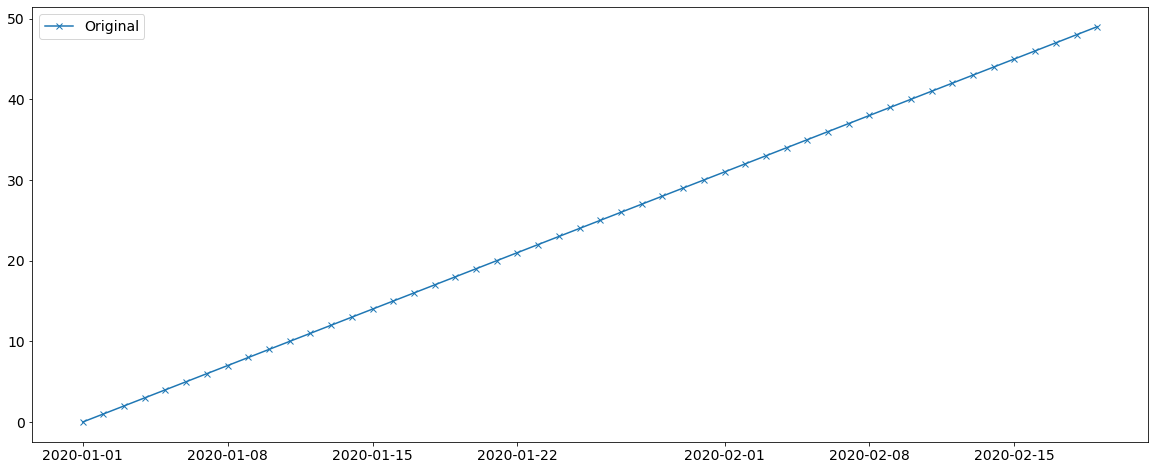

In [73]:
plt.figure(figsize=(20,8))
plt.plot(data.index,data['Original'],marker='x')
plt.legend(loc='best',labels =['Original'],fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Creating required input format and Parameters Definition

In [103]:
# Parameters for TimeSeriesGenerator and LSTM Model

attr = train.shape[1]
n_input = 10              # X time units for prediction 
n_features = attr         # No. of series used (in this case is 1 for only using 1 attribute)
batch_s = 2               # batch_size
epochs = 30               # No. of epochs for each batch
neurons = 150              # No. of neurons to use

# Creating required input format
generator = TimeseriesGenerator(train,
                                train,
                                length = n_input,
                                batch_size = batch_s)

### LSTM Model Creator

In [104]:
# Creating random seed values - For checking purposes
#seed = 2020
#np.random.seed(seed)

# Creating the model
model = Sequential()

# Creating Hidden Layer(s)
model.add(LSTM(neurons, 
               activation = 'linear',
               input_shape=(n_input,n_features)))
model.add(Dense(1))                               # Only 1 output

model.compile(optimizer='adam',
              loss='mse')

# Fitting the model
model.fit_generator(generator,
                    epochs = epochs,
                   verbose = 2)

Epoch 1/30
 - 3s - loss: 0.1149
Epoch 2/30
 - 0s - loss: 0.0073
Epoch 3/30
 - 0s - loss: 0.0033
Epoch 4/30
 - 0s - loss: 6.9889e-04
Epoch 5/30
 - 0s - loss: 2.7421e-04
Epoch 6/30
 - 0s - loss: 1.4578e-04
Epoch 7/30
 - 0s - loss: 1.9740e-05
Epoch 8/30
 - 0s - loss: 1.7495e-05
Epoch 9/30
 - 0s - loss: 8.7643e-06
Epoch 10/30
 - 0s - loss: 8.2440e-06
Epoch 11/30
 - 0s - loss: 6.0761e-06
Epoch 12/30
 - 0s - loss: 6.0328e-06
Epoch 13/30
 - 0s - loss: 6.4909e-06
Epoch 14/30
 - 0s - loss: 6.4446e-06
Epoch 15/30
 - 0s - loss: 5.9006e-06
Epoch 16/30
 - 0s - loss: 4.6349e-06
Epoch 17/30
 - 0s - loss: 3.9121e-06
Epoch 18/30
 - 0s - loss: 5.2451e-06
Epoch 19/30
 - 0s - loss: 6.3118e-06
Epoch 20/30
 - 0s - loss: 8.3422e-06
Epoch 21/30
 - 0s - loss: 1.1704e-05
Epoch 22/30
 - 0s - loss: 2.4649e-05
Epoch 23/30
 - 0s - loss: 4.3929e-06
Epoch 24/30
 - 1s - loss: 4.2312e-06
Epoch 25/30
 - 0s - loss: 4.8899e-06
Epoch 26/30
 - 0s - loss: 3.6857e-06
Epoch 27/30
 - 0s - loss: 4.0558e-06
Epoch 28/30
 - 0s - lo

### Creating the prediction list

In [105]:
pred_list= []

batch = train[-n_input:].reshape((1,n_input,n_features))

# The cycle is for adding (appending) the predicted value to the prediction list, and used it for the next value prediction and so forth.

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis = 1)
    

### Unscale predicted values

In [106]:
# Inverse transform the prediction values, to the unscaled values
data_predict = pd.DataFrame(scaler.inverse_transform(pred_list),index = data[-n_input:].index,columns=['Validation'])

data_test = pd.concat([data,data_predict],axis=1)


In [107]:
data_test.tail(n_input+1)    # Show the n_input + 1 entries (to include at least 1 NaN values, 
                             # it will try to predict the last 10 values of the data.


,Original,Validation
2020-02-09,39,NaN
2020-02-10,40,40.239355
2020-02-11,41,41.289629
2020-02-12,42,42.360210
2020-02-13,43,43.445789
2020-02-14,44,44.544321
2020-02-15,45,45.655164
2020-02-16,46,46.778374
2020-02-17,47,47.914350
2020-02-18,48,49.063707


### Validation Timeseries Plot

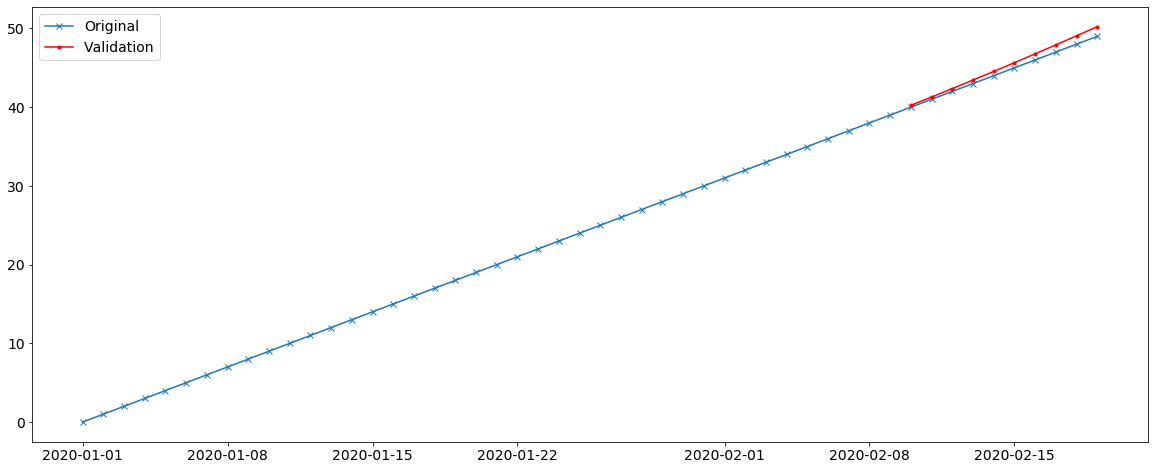

In [111]:
# Validation plot
import matplotlib.pyplot as plt  

plt.figure(figsize=(20,8))
plt.plot(data_test.index,data_test['Original'],marker='x')
plt.plot(data_test.index,data_test['Validation'],marker='.',color='red')
plt.legend(loc='best',labels =['Original','Validation'],fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### New Prediction Model

In [112]:
# New prediction model (after validation data)

# We are going to use the whole original dataset
train = data

# Then, we'll scale it (as before)
scaler.fit(train)
train = scaler.transform(train)

# Parameters for TimeSeriesGenerator and LSTM
attr = train.shape[1]
n_input = 10              # Lentgh of individual bach series 
n_features = attr         # No. of series used (in this case is 1 for only using 1 attribute)
batch_s = 2               # batch_size
epochs = 30               # No. of epochs for each batch group

generator = TimeseriesGenerator(train,
                                train,
                                length = n_input,
                                batch_size = batch_s)

# We are assuming the new model has the same FIT parameteres as the training dataset before
model.fit_generator(generator,
                    epochs = epochs,
                   verbose = 2)



Epoch 1/30
 - 0s - loss: 2.5480e-04
Epoch 2/30
 - 0s - loss: 5.1510e-05
Epoch 3/30
 - 0s - loss: 1.1262e-05
Epoch 4/30
 - 0s - loss: 6.3279e-06
Epoch 5/30
 - 0s - loss: 3.6138e-06
Epoch 6/30
 - 0s - loss: 5.8825e-06
Epoch 7/30
 - 1s - loss: 4.3827e-06
Epoch 8/30
 - 0s - loss: 1.2706e-05
Epoch 9/30
 - 1s - loss: 1.0707e-05
Epoch 10/30
 - 1s - loss: 4.0876e-06
Epoch 11/30
 - 0s - loss: 9.5523e-06
Epoch 12/30
 - 0s - loss: 2.6969e-06
Epoch 13/30
 - 1s - loss: 1.7804e-06
Epoch 14/30
 - 1s - loss: 1.9194e-06
Epoch 15/30
 - 1s - loss: 5.1525e-06
Epoch 16/30
 - 1s - loss: 1.3029e-05
Epoch 17/30
 - 0s - loss: 7.1842e-06
Epoch 18/30
 - 0s - loss: 1.1703e-05
Epoch 19/30
 - 0s - loss: 1.7899e-05
Epoch 20/30
 - 0s - loss: 7.3439e-06
Epoch 21/30
 - 0s - loss: 1.4844e-05
Epoch 22/30
 - 0s - loss: 1.3623e-06
Epoch 23/30
 - 1s - loss: 1.3852e-06
Epoch 24/30
 - 0s - loss: 4.2288e-06
Epoch 25/30
 - 1s - loss: 1.8343e-06
Epoch 26/30
 - 0s - loss: 6.9097e-07
Epoch 27/30
 - 0s - loss: 1.2932e-06
Epoch 28/3

### Creating the NEW prediction list

In [113]:
# New prediction variable

pred_listn= []

batchn = train[-n_input:].reshape((1,n_input,n_features))

# The cycle is for adding (appending) the predicted value to the prediction list, and used it for the next value prediction and so forth.

for i in range(n_input):
    pred_listn.append(model.predict(batchn)[0])
    batchn = np.append(batchn[:,1:,:],[[pred_listn[i]]],axis = 1)


### Creating new future dates for the original Dataset

In [115]:
# Add new dates to the predicted variables

from pandas.tseries.offsets import DateOffset
n_inputs2 = n_input+1

add_dates = [data.index[-1]+DateOffset(days=x) for x in range(0,n_inputs2)]   # Creating additional date entries for the original dataframe
future_dates = pd.DataFrame(index = add_dates[1:],columns = data.columns)

future_dates.tail(13)

,Original
2020-02-20,NaN
2020-02-21,NaN
2020-02-22,NaN
2020-02-23,NaN
2020-02-24,NaN
2020-02-25,NaN
2020-02-26,NaN
2020-02-27,NaN
2020-02-28,NaN
2020-02-29,NaN


### Unscale NEW predicted values

In [116]:
# Update predicted data with new dates, unscaled values, and concatenate with existing data

data_predictn = pd.DataFrame(scaler.inverse_transform(pred_listn),
                         index = future_dates[-n_input:].index,
                         columns=['Prediction'])
data_proj = pd.concat([data,data_predictn],axis=1)


In [117]:
data_proj.tail(13)

,Original,Prediction
2020-02-17,47.0,NaN
2020-02-18,48.0,NaN
2020-02-19,49.0,NaN
2020-02-20,NaN,49.952130
2020-02-21,NaN,50.953999
2020-02-22,NaN,51.953607
2020-02-23,NaN,52.952888
2020-02-24,NaN,53.952806
2020-02-25,NaN,54.953892
2020-02-26,NaN,55.956509


### Future Prediction Plot

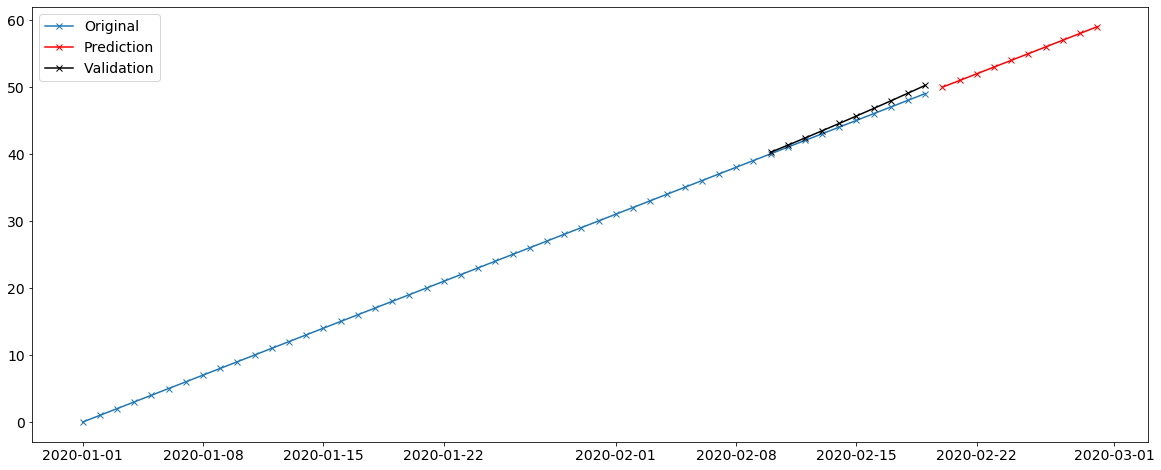

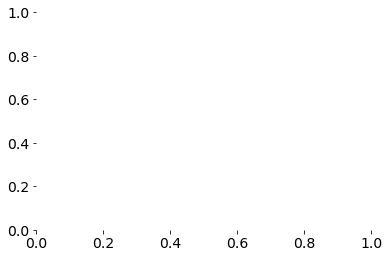

In [209]:
# Plot future predictions

import matplotlib.patches as patches

plt.figure(figsize=(20,8))
plt.plot(data_proj.index,data_proj['Original'],marker='x')
plt.plot(data_proj.index,data_proj['Prediction'],color='red',marker='x')
plt.plot(data_test.index,data_test['Validation'],color='black',marker='x')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best',fontsize=14,labels=['Original','Prediction','Validation'])       
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

plt.box()

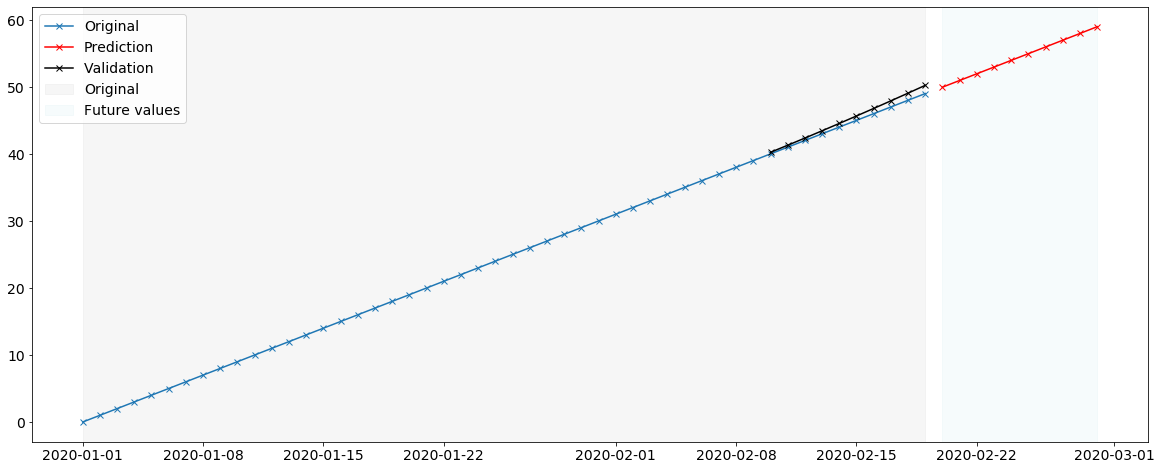

In [208]:
from matplotlib.patches import Rectangle 

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111) 
ax.plot(data_proj.index,data_proj['Original'],marker='x')
ax.plot(data_proj.index,data_proj['Prediction'],color='red',marker='x')
ax.plot(data_test.index,data_test['Validation'],color='black',marker='x')
ax.axvspan(data.index[0], data.index[-1], color='lightgrey', alpha=0.2,label='Original')    # Grey box of existing data
ax.axvspan(data_proj.index[-n_input], data_proj.index[-1], color='lightblue', alpha=0.1,label='Future values')   # Grey box of existing data

plt.rc('xtick', labelsize = 14)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 14)    # fontsize of the tick labels

ax.legend(loc='best',fontsize=14,labels=['Original','Prediction','Validation','Original','Future values']) 